In [ ]:
import numpy as np
import scipy as sp
from scipy.linalg import eig
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from numpy.random import uniform as uni

def F2at(F1):
  return F1/27.211 *0.052918*1e-4

def om2at(om1):
  return om1 *2.418884e-17

def H_make(V2,F2,alpha2,X2):
  out2 = np.zeros((len(V2),len(V2)))
  for i2 in range(len(V2)):
    for j2 in range(len(V2)):
      if np.abs(i2-j2) ==1:
        out2[i2,j2] = -alpha2
      elif i2==j2:
        out2[i2,j2] = 2*alpha2 + V2[i2] +F2*X2[i2]
  return out2

def eigen(H3):
  vals, vecs = eigh(H3,subset_by_index= [0,3])
  return vals,vecs

def Vt(F4,X4,om4,t4):
  return  F4*X4 *np.sin(om4*t4)

def cn_prim(alpha5,psi5,Vw5,Vt5):
  n5=len(psi5)
  out5 = np.zeros(n5,dtype='complex')
#   out5[0] = -complex(alpha5)*(complex(psi5[1])-complex(2)*complex(psi5[0]))+complex(Vw5[0])*complex(psi5[0])+complex(Vt5[0])*complex(psi5[0])
#   out5[n5-1] = -complex(alpha5)*(complex(psi5[n5-2])-complex(2)*complex(psi5[n5-1]))+complex(Vw5[n5-1])*complex(psi5[n5-1])+complex(Vt5[n5-1])*complex(psi5[n5-1])
#   for i5 in range(1,n5-1):
#     out5[i5] = -complex(alpha5)*(complex(psi5[i5+1])+complex(psi5[i5-1])-complex(2)*complex(psi5[i5]))+complex(Vw5[i5])*complex(psi5[i5])+complex(Vt5[i5])*complex(psi5[i5])

  out5[0] = -alpha5 * (psi5[1] - 2*psi5[0]) + Vw5[0]*psi5[0] + Vt5[0]*psi5[0]
  out5[n5-1] = -alpha5 * (psi5[n5-2] - 2*psi5[n5-1]) + Vw5[n5-1]*psi5[n5-1] + Vt5[n5-1]*psi5[n5-1]
  for i5 in range(1,n5-1):
    out5[i5] = -alpha5 * (psi5[i5+1] + psi5[i5-1] - 2*psi5[i5]) + Vw5[i5]*psi5[i5] + Vt5[i5]*psi5[i5]
  return out5

def c_n(psi0_6,dt6,om6,X6,F6,alpha6,Vw6):
  psi_next6 = psi0_6+0j
  Vt6_ = Vt(F6,X6,om6,0)
  Vt6 = Vt(F6,X6,om6,dt6)
  psi0_prim6 = cn_prim(alpha6,psi0_6,Vw6,Vt6_)
  for i6 in range(10):
    psi_prim6 = psi0_prim6 + cn_prim(alpha6,psi_next6,Vw6,Vt6)
    psi_next6 = psi0_6 + psi_prim6*dt6/(2*complex(0,1))
  return psi_next6

def a_c(psi0_7,dt7,om7,X7,F7,alpha7,Vw7,N7,psi11,dx7):
  psi1_7= psi0_7+0j
#   psi1_7/=np.sqrt(sum(np.abs(psi1_7)*np.abs(psi1_7)*dx7))
  psi2_7= c_n(psi0_7,dt7,om7,X7,F7,alpha7,Vw7)
#   psi2_7/=np.sqrt(sum(np.abs(psi2_7)*np.abs(psi2_7)*dx7))
  M7 = 10000

  #plt.show()
  out7 = np.zeros((3,int(N7//M7)))
  for it7 in range(N7):
    Vt7 = Vt(F7,X7,om7,dt7*(it7+2))
    psi_prim7=cn_prim(alpha7,psi2_7,Vw7,Vt7)
    psi_tmp7 = psi2_7
    psi2_7 = psi1_7 + 2*dt7*psi_prim7 /complex(0,1)
    #psi2_7 = psi2_7/np.sqrt(sum(np.abs(psi2_7)*np.abs(psi2_7)*dx7))
    psi1_7 = psi_tmp7
    if it7%M7==0:
      psi20 = np.abs(sum(np.conj(psi2_7)*psi0_7*dx7))**2
      psi21 = np.abs(sum(np.conj(psi2_7)*psi11*dx7))**2
      out7[0,it7//M7] = psi20
      out7[1,it7//M7] = psi21
      out7[2,it7//M7] = psi20 +psi21

#       fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
#       ax = fig.add_subplot(111)
#       plt.plot(X,Vw7*Eh,label = r'$V_w$')
#       plt.plot(X,psi0_7,label = r'$\psi_0$')
#       plt.plot(X,psi11,label = r'$\psi_1$')
#       plt.plot(X,(psi2_7.real),label = r'$\psi_1(dt)$')
#       plt.plot(X,(psi2_7.imag),label = r'$\psi_1(dt)$')
#       plt.legend()

  return out7



def a_c1(psi0_7,dt7,om7,X7,F7,alpha7,Vw7,N7,psi11,dx7):
  psi1_7= psi0_7+0j
#   psi1_7/=np.sqrt(sum(np.abs(psi1_7)*np.abs(psi1_7)*dx7))
  psi2_7= c_n(psi0_7,dt7,om7,X7,F7,alpha7,Vw7)
#   psi2_7/=np.sqrt(sum(np.abs(psi2_7)*np.abs(psi2_7)*dx7))
  M7 = 10000

  #plt.show()
  out7 = np.zeros(int(N7//M7))
  for it7 in range(N7):
    Vt7 = Vt(F7,X7,om7,dt7*(it7+2))
    psi_prim7=cn_prim(alpha7,psi2_7,Vw7,Vt7)
    psi_tmp7 = psi2_7
    psi2_7 = psi1_7 + 2*dt7*psi_prim7 /complex(0,1)
    #psi2_7 = psi2_7/np.sqrt(sum(np.abs(psi2_7)*np.abs(psi2_7)*dx7))
    psi1_7 = psi_tmp7
    if it7%M7==0:
      out7[it7//M7] = np.abs(sum(np.conj(psi2_7)*psi11*dx7))**2

  return out7


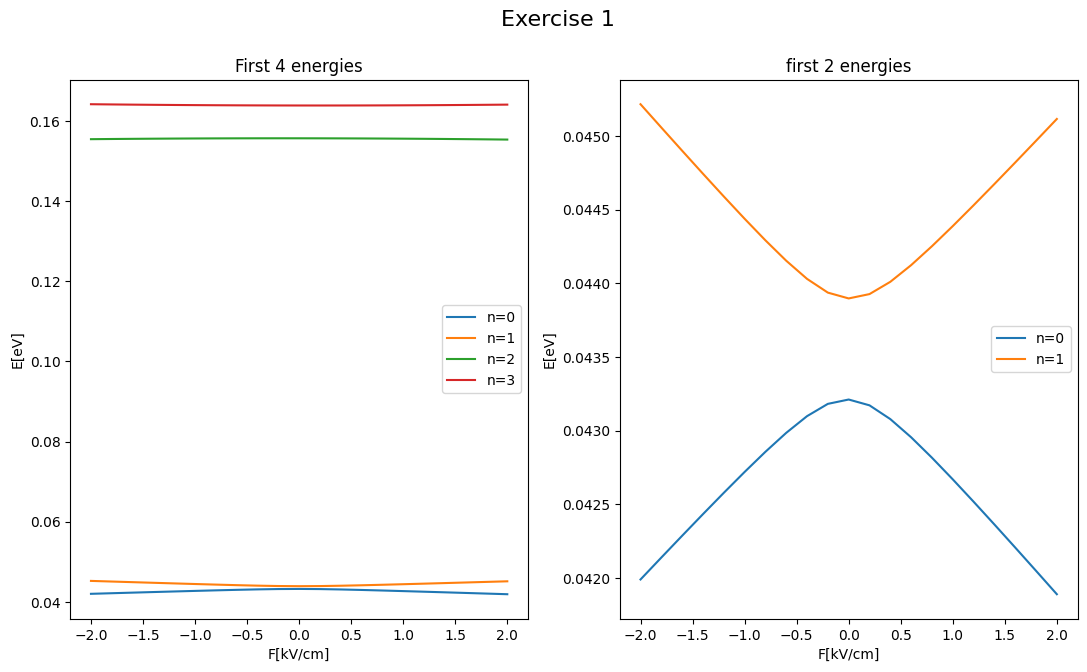

In [ ]:
#zadanie 1

Eh = 27.211
Xh = 0.052918
n=99
m=0.067
a=25/Xh
x1=12/Xh
x2= 4/Xh
V2= 0.2/Eh
V1=0.25/Eh
dx=2*a/(n+1)
tab = np.zeros(n+2)
X = np.linspace(-a,a,n+2)
Vw = np.zeros(n+2)
alpha=1/(2*m*dx**2)
Nf = 21
Fs = np.linspace(F2at(-2),F2at(2),Nf)

for it1 in range(n+2):
  if np.abs(X[it1])>=x1:
    Vw[it1] = V1
  elif np.abs(X[it1])<x2:
    Vw[it1] = V2

Ex1 = np.zeros((4,Nf))
Fs_plot = np.linspace(-2,2,Nf)

for F in Fs:
  H = H_make(Vw,F,alpha,X)
  Ex1[:,np.where(Fs==F)[0][0]] ,vectors = eigen(H)

Ex1*=Eh

fig, axs = plt.subplots(1,2,figsize=(13,7))
fig.suptitle('Exercise 1',fontsize = 16)

plt.sca(axs[0])
plt.title('First 4 energies')
plt.xlabel(r'F[kV/cm]')
plt.ylabel(r'E[eV]')
plt.plot(Fs_plot,Ex1[0,:],label = 'n=0')
plt.plot(Fs_plot,Ex1[1,:],label = 'n=1')
plt.plot(Fs_plot,Ex1[2,:],label = 'n=2')
plt.plot(Fs_plot,Ex1[3,:],label = 'n=3')

plt.legend()

plt.sca(axs[1])
plt.title('first 2 energies')
plt.xlabel(r'F[kV/cm]')
plt.ylabel(r'E[eV]')
plt.plot(Fs_plot,Ex1[0,:],label = 'n=0')
plt.plot(Fs_plot,Ex1[1,:],label = 'n=1')

plt.legend()

plt.show()

0.0006859076501426187


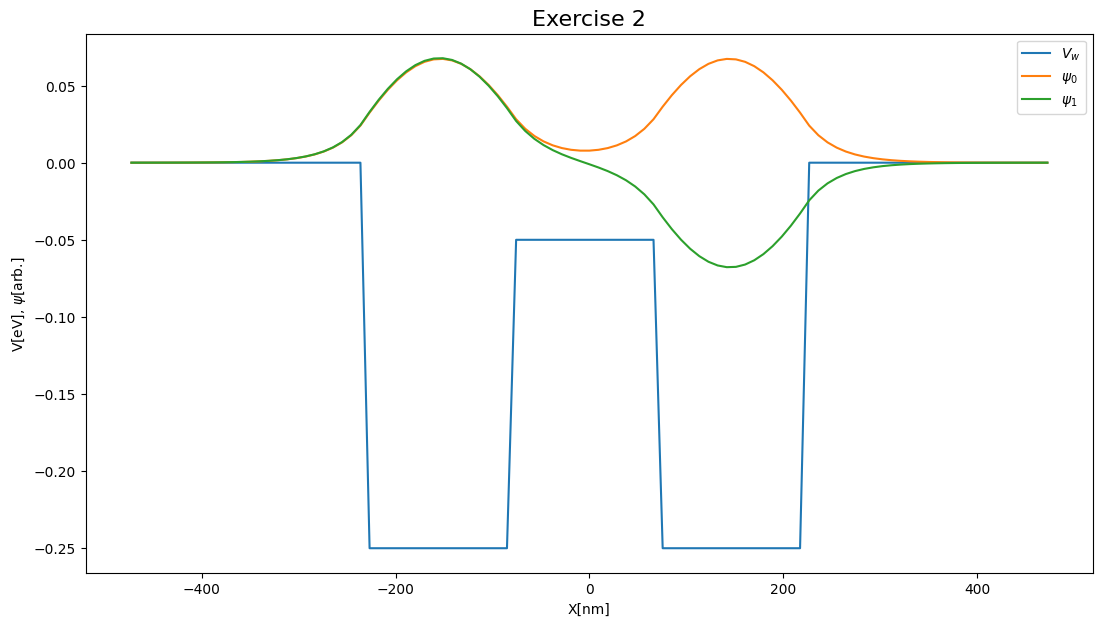

In [ ]:
#zadanie 2
Eh = 27.211
Xh = 0.052918
n=99
m=0.067
a=25/Xh
x1=12/Xh
x2= 4/Xh
V2= 0.2/Eh
V1=0.25/Eh
dx=2*a/(n+1)
tab = np.zeros(n+2)
X = np.linspace(-a,a,n+2)
Vw = np.zeros(n+2)
alpha=1/(2*m*dx**2)
F=0

for it1 in range(n+2):
  if np.abs(X[it1])>=x1:
    Vw[it1] = V1
  elif np.abs(X[it1])<x2:
    Vw[it1] = V2

H = H_make(Vw,F,alpha,X)

energies ,vectors = eigen(H)

psi_0 = vectors.T[0,:]
psi_1 = vectors.T[1,:]

print((energies[1]-energies[0])*Eh)

psi_0 = psi_0/np.sqrt(sum(np.abs(psi_0)*np.abs(psi_0)*dx))

psi_1 = psi_1/np.sqrt(sum(np.abs(psi_1)*np.abs(psi_1)*dx))

fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel('V[eV], $\psi$[arb.]')
ax.set_xlabel(r'X[nm]')
ax.set_title(r'Exercise 2', fontsize = 16)
plt.plot(X,Vw*Eh-V1*Eh,label = r'$V_w$')
plt.plot(X,psi_0,label = r'$\psi_0$')
plt.plot(X,psi_1,label = r'$\psi_1$')
plt.legend()

plt.show()

In [ ]:
#zadanie 3
Eh = 27.211
Xh = 0.052918
n=99
m=0.067
a=25/Xh
x1=12/Xh
x2= 4/Xh
V2= 0.2/Eh
V1=0.25/Eh
dx=2*a/(n+1)
tab = np.zeros(n+2)
X = np.linspace(-a,a,n+2)
Vw = np.zeros(n+2)

for it1 in range(n+2):
  if np.abs(X[it1])>=x1:
    Vw[it1] = V1
  elif np.abs(X[it1])<x2:
    Vw[it1] = V2

alpha=1/(2*m*dx**2)
F=F2at(0.08)
dt=1
nsteps=int(3e6)
om = 104.22e-7 *2.418884

A_C = a_c(psi_0,dt,om,X,F,alpha,Vw,nsteps,psi_1,dx)

length = len(A_C[0,:])

xax = np.linspace(0,(10000*(length-1))*2.418884e-8,length)




fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_title(r'Wyniki symulacji', fontsize = 16)
plt.plot(xax, A_C[0,:],label=r'Rzut na $\psi_0$')
plt.plot(xax, A_C[1,:],label=r'Rzut na $\psi_1$')
plt.plot(xax, A_C[2,:],label=r'Suma rzutów')
plt.xlabel('t[ns]',fontsize = 12)
plt.ylabel(r'$|\psi|^2$',fontsize = 12)
plt.legend()
plt.show()

KeyboardInterrupt: ignored

In [ ]:
#zadanie 3
Eh = 27.211
Xh = 0.052918
n=99
m=0.067
a=25/Xh
x1=12/Xh
x2= 4/Xh
V2= 0.2/Eh
V1=0.25/Eh
dx=2*a/(n+1)
tab = np.zeros(n+2)
X = np.linspace(-a,a,n+2)
Vw = np.zeros(n+2)

for it1 in range(n+2):
  if np.abs(X[it1])>=x1:
    Vw[it1] = V1
  elif np.abs(X[it1])<x2:
    Vw[it1] = V2

alpha=1/(2*m*dx**2)
dt=1
nsteps=int(3e6)
om = 104.22e-7 *2.418884

Fs = np.linspace(0,F2at(0.2),21)

A_C1 = np.zeros(21,int(nsteps//10000))


for F in Fs:


  A_C1[np.where(Fs==F)[0][0],:] = a_c1(psi_0,dt,om,X,F,alpha,Vw,nsteps,psi_1,dx)



length = len(A_C1[0,:])





array([2.-3.j, 0.-2.j])

In [ ]:
fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_title(r'Wyniki symulacji', fontsize = 16)
plt.imshow(A_C1)
plt.xlim(0,0.08)
plt.ylim(0,0.2)
plt.xlabel('t[ns]',fontsize = 12)
plt.ylabel(r'F[kV/cm]',fontsize = 12)
plt.colorbar()
plt.show()

In [ ]:
abc = np.zeros((101,201))
a = np.linspace(0,10,101)
c = np.linspace(0,50,201)

for i in range(101):
  abc[i,:] = np.sin(c)*np.cos(a[i])


fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_title(r'Wyniki symulacji', fontsize = 16)
plt.imshow(abc)
plt.xlim(0,0.08)
plt.ylim(0,0.2)
plt.xlabel('t[ns]',fontsize = 12)
plt.ylabel(r'F[kV/cm]',fontsize = 12)
plt.colorbar()
plt.show()